In [13]:
import cv2

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [108]:
image= mpimg.imread(r"C:\Users\ihrishi\Desktop\aa.jpg")

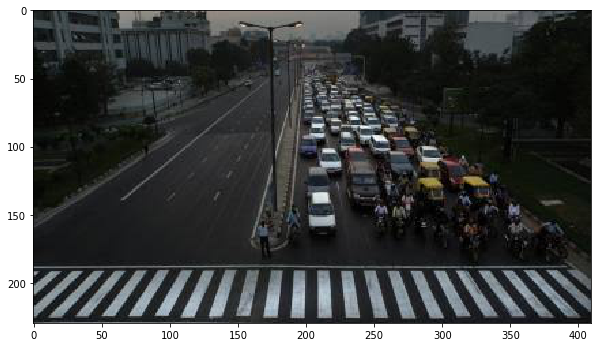

In [109]:
plt.figure(figsize=(10,10))
plt.imshow(image)

In [110]:
img= cv2.imread(r"C:\Users\ihrishi\Desktop\aa.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#edges = red_select(image, thresh=(180,255))
edges = cv2.Canny(gray, 80, 120)
lines = cv2.HoughLinesP(edges, 1, 3.14/2, 2, None, 30, 1);
for line in lines[0]:
    pt1 = (line[0],line[1])
    pt2 = (line[2],line[3])
    cv2.line(img, pt1, pt2, (255,0,0), 3)

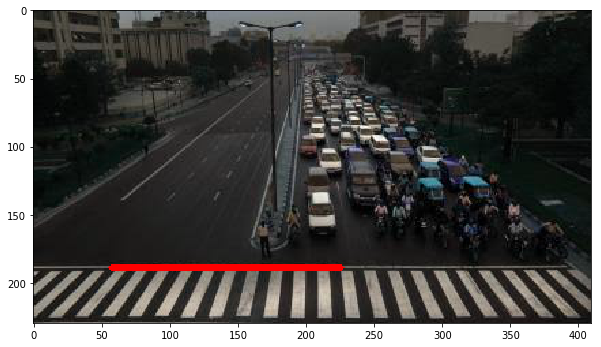

In [111]:
plt.figure(figsize=(10,10))
plt.imshow(img)

In [132]:
(pt1, pt2)

((57, 189), (226, 189))

In [133]:
m= (pt2[1]-pt1[1])/(pt2[0]-pt1[0])
print(m)

0.0


In [141]:
img.shape

(230, 410, 3)

In [ ]:
pt1=(0,pt1[1])
pt2=(img.shape[1],pt2[1])

In [150]:
(pt1, pt2)

((0, 189), (410, 189))

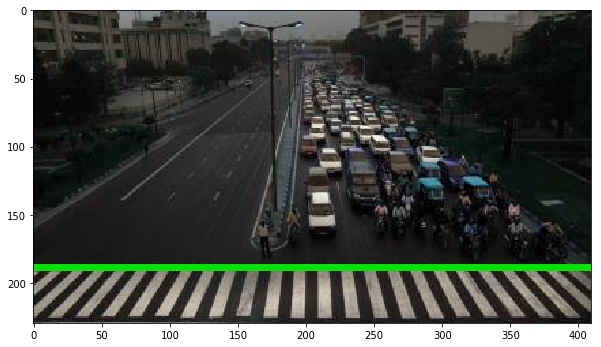

In [151]:
cv2.line(img, pt1, pt2, (0,225,0), 3)
plt.figure(figsize=(10,10))
plt.imshow(img)

## Experimental

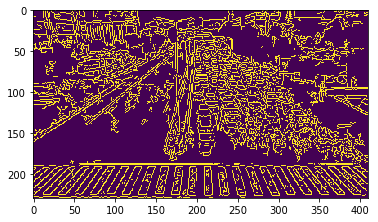

In [117]:
image= cv2.imread(r"C:\Users\ihrishi\Desktop\aa.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny=cv2.Canny(image,10,90)
plt.imshow(canny)

In [131]:
img= cv2.imread(r"C:\Users\ihrishi\Desktop\aa.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#edges = red_select(image, thresh=(180,255))
edges = binary_pipeline(img)
lines = cv2.HoughLinesP(edges, 1, 3.14/2, 2, None, 30, 1);
for line in lines[0]:
    pt1 = (line[0],line[1])
    pt2 = (line[2],line[3])
    cv2.line(img, pt1, pt2, (0,0,255), 3)

plt.figure(figsize=(10,10))
plt.imshow(img)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
edges = binary_pipeline(img)

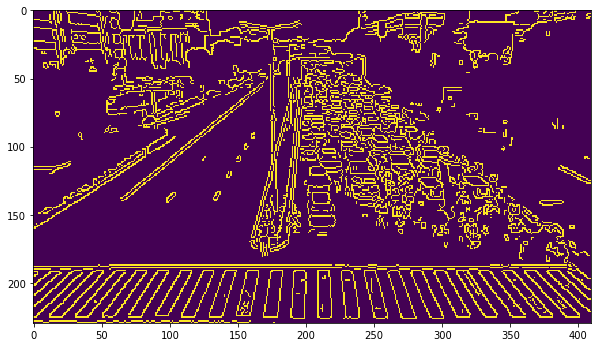

In [129]:
plt.figure(figsize=(10,10))
plt.imshow(edges)

In [119]:
(pt1, pt2)

((57, 189), (226, 189))

In [87]:
def mag_threshold(img,sobel_kernal=3,thresh=(0,255)):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    x=cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernal)
    y=cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernal)

    mag=np.sqrt(x**2 + y**2)

    scale=np.max(mag)/255
    eightbit=(mag/scale).astype(np.uint8)
    binary_output=np.zeros_like(eightbit)
    binary_output[(eightbit>thresh[0]) & (eightbit<thresh[1])]=1
    return binary_output

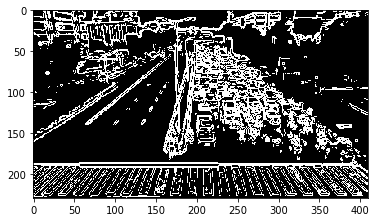

In [88]:
plt.imshow(mag_threshold(image, thresh=(20,100)),  cmap='gray');

In [89]:
def abs_sobel_thresh(img, orient='x', thresh=(0,255)):
    # Convert to grayscale
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv.Sobel(gray, cv.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv.Sobel(gray, cv.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1

    # Return the result
    return binary_output

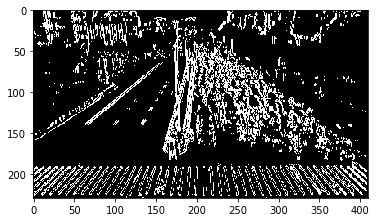

In [90]:
plt.imshow(abs_sobel_thresh(image, thresh=(20,110)),  cmap='gray');

In [91]:
def mag_threshold(img, sobel_kernel=3, thresh=(0, 255)):
    # 1) Convert to grayscale
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    x = cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=sobel_kernel)
    y = cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the xy magnitude 
    mag = np.sqrt(x**2 + y**2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale = np.max(mag)/255
    eightbit = (mag/scale).astype(np.uint8)
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(eightbit)
    binary_output[(eightbit > thresh[0]) & (eightbit < thresh[1])] =1 
    return binary_output


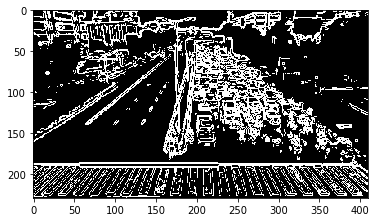

In [92]:
plt.imshow(mag_threshold(image, thresh=(20,100)),  cmap='gray');

In [93]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    # 1) Convert to grayscale
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    x = np.absolute(cv.Sobel(gray, cv.CV_64F, 1, 0, ksize=sobel_kernel))
    y = np.absolute(cv.Sobel(gray, cv.CV_64F, 0, 1, ksize=sobel_kernel))
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    direction = np.arctan2(y, x)
    binary_output = np.zeros_like(direction)
    binary_output[(direction > thresh[0]) & (direction < thresh[1])] = 1
    return binary_output

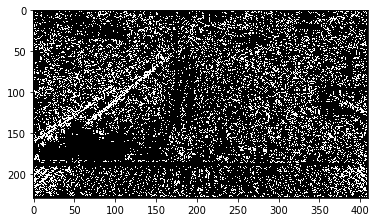

In [94]:
plt.imshow(dir_threshold(image, thresh=(0.8,1.2)),  cmap='gray');

In [95]:
def red_select(img, thresh=(0, 255)):
    # Apply a threshold to the R channel
    R = img[:,:,0]
    # Return a binary image of threshold result
    binary_output = np.zeros_like(R)
    binary_output[(R > thresh[0]) & (R <= thresh[1])] = 1
    return binary_output

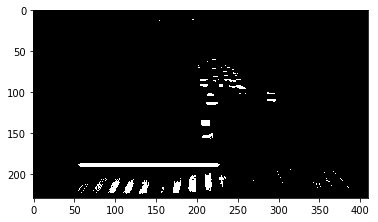

In [97]:
plt.imshow(red_select(image, thresh=(180,255)),  cmap='gray');

In [98]:
def hls_select(img, sthresh=(0, 255),lthresh=()):
    # 1) Convert to HLS color space
    hls_img = cv.cvtColor(img, cv.COLOR_RGB2HLS)
    # 2) Apply a threshold to the S channel
    L = hls_img[:,:,1]
    S = hls_img[:,:,2]
    # 3) Return a binary image of threshold result
    binary_output = np.zeros_like(S)
    binary_output[(S >= sthresh[0]) & (S <= sthresh[1])
                 & (L > lthresh[0]) & (L <= lthresh[1])] = 1
    return binary_output

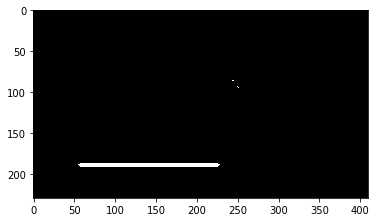

In [99]:
plt.imshow(hls_select(image, sthresh=(140,255), lthresh=(120, 255)),  cmap='gray');

## Combining Filter Methods

In [100]:
def binary_pipeline(img):
    
    img_copy = cv.GaussianBlur(img, (3, 3), 0)
    #img_copy = np.copy(img)
    
    # color channels
    s_binary = hls_select(img_copy, sthresh=(140, 255), lthresh=(120, 255))
    #red_binary = red_select(img_copy, thresh=(200,255))
    
    # Sobel x
    x_binary = abs_sobel_thresh(img_copy,thresh=(25, 200))
    y_binary = abs_sobel_thresh(img_copy,thresh=(25, 200), orient='y')
    xy = cv.bitwise_and(x_binary, y_binary)
    
    #magnitude & direction
    mag_binary = mag_threshold(img_copy, sobel_kernel=3, thresh=(30,100))
    dir_binary = dir_threshold(img_copy, sobel_kernel=3, thresh=(0.8, 1.2))
    
    # Stack each channel
    gradient = np.zeros_like(s_binary)
    gradient[((x_binary == 1) & (y_binary == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
    final_binary = cv.bitwise_or(s_binary, gradient)
    
    return final_binary

<Figure size 432x288 with 0 Axes>

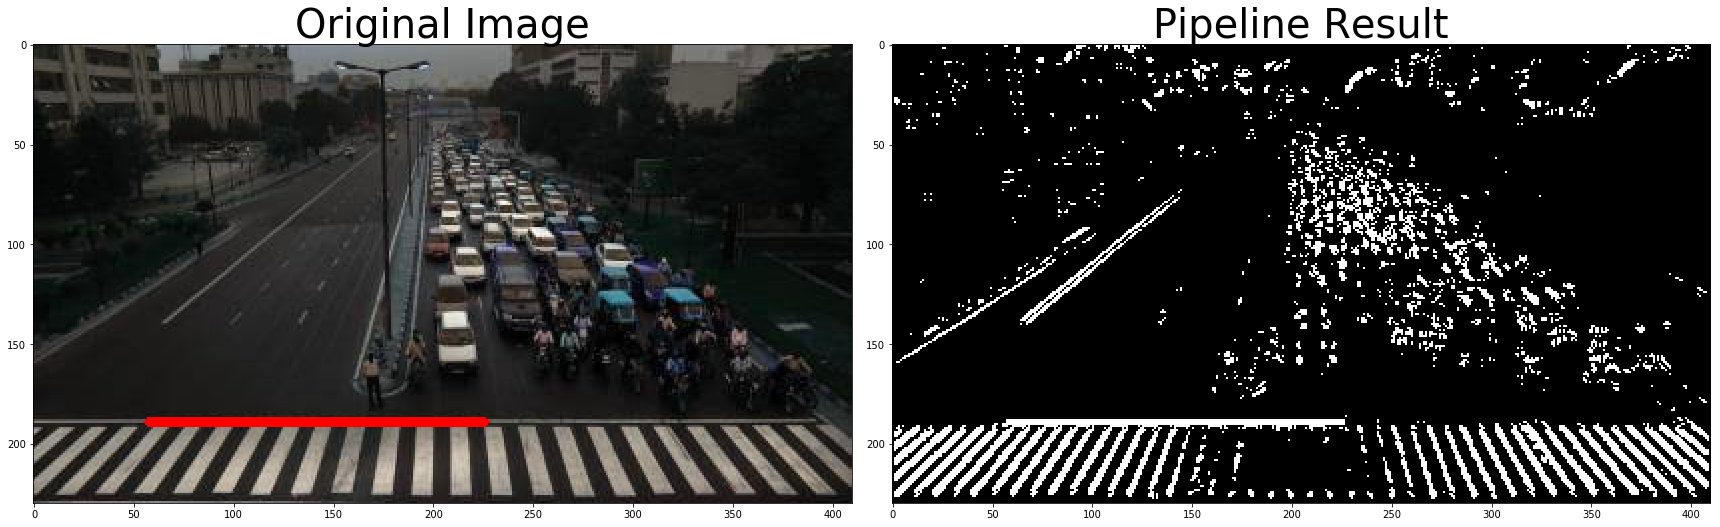

In [101]:
result = binary_pipeline(image)

# Plot the result
plt.figure()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result, cmap='gray')
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.tight_layout()
